In [3]:
#import the libraries

import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored as cl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2


df = pd.read_csv('/home/kyo/Downloads/House_Data.csv')
df.head()

,Id,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,1,8450,196.0,150,856,856,854,1710,548,0,61,208500
1,2,9600,0.0,284,1262,1262,0,1262,460,298,0,181500
2,3,11250,162.0,434,920,920,866,1786,608,0,42,223500
3,4,9550,0.0,540,756,961,756,1717,642,0,35,140000
4,5,14260,350.0,490,1145,1145,1053,2198,836,192,84,250000


In [4]:
#plot the basic graph
sb.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

In [12]:
#remove all null values
df.dropna(inplace=True)
#df.head()
df.describe()

,Id,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,729.822314,10507.276171,103.685262,567.070937,1055.847107,1161.270661,346.944215,1514.091598,472.475207,94.416667,46.390496,180615.063361
std,421.938123,9989.563592,181.066207,442.082927,438.119089,385.018424,436.370724,525.627765,214.106397,125.393706,66.048619,79285.541485
min,1.000000,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,364.750000,7538.750000,0.000000,222.500000,794.750000,882.000000,0.000000,1128.000000,327.750000,0.000000,0.000000,129900.000000
50%,729.500000,9478.500000,0.000000,477.500000,990.500000,1086.000000,0.000000,1461.500000,478.000000,0.000000,24.000000,162700.000000
75%,1095.250000,11600.000000,166.000000,808.000000,1297.250000,1391.000000,728.000000,1776.000000,576.000000,168.000000,68.000000,214000.000000
max,1460.000000,215245.000000,1600.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,755000.000000


In [13]:
#we have to only consider numeric values to predict the data, also change data type from any numeric to int
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')
df.dtypes
df['MasVnrArea'] = df['MasVnrArea'].astype('int64')
print(pd.DataFrame)

<class 'pandas.core.frame.DataFrame'>


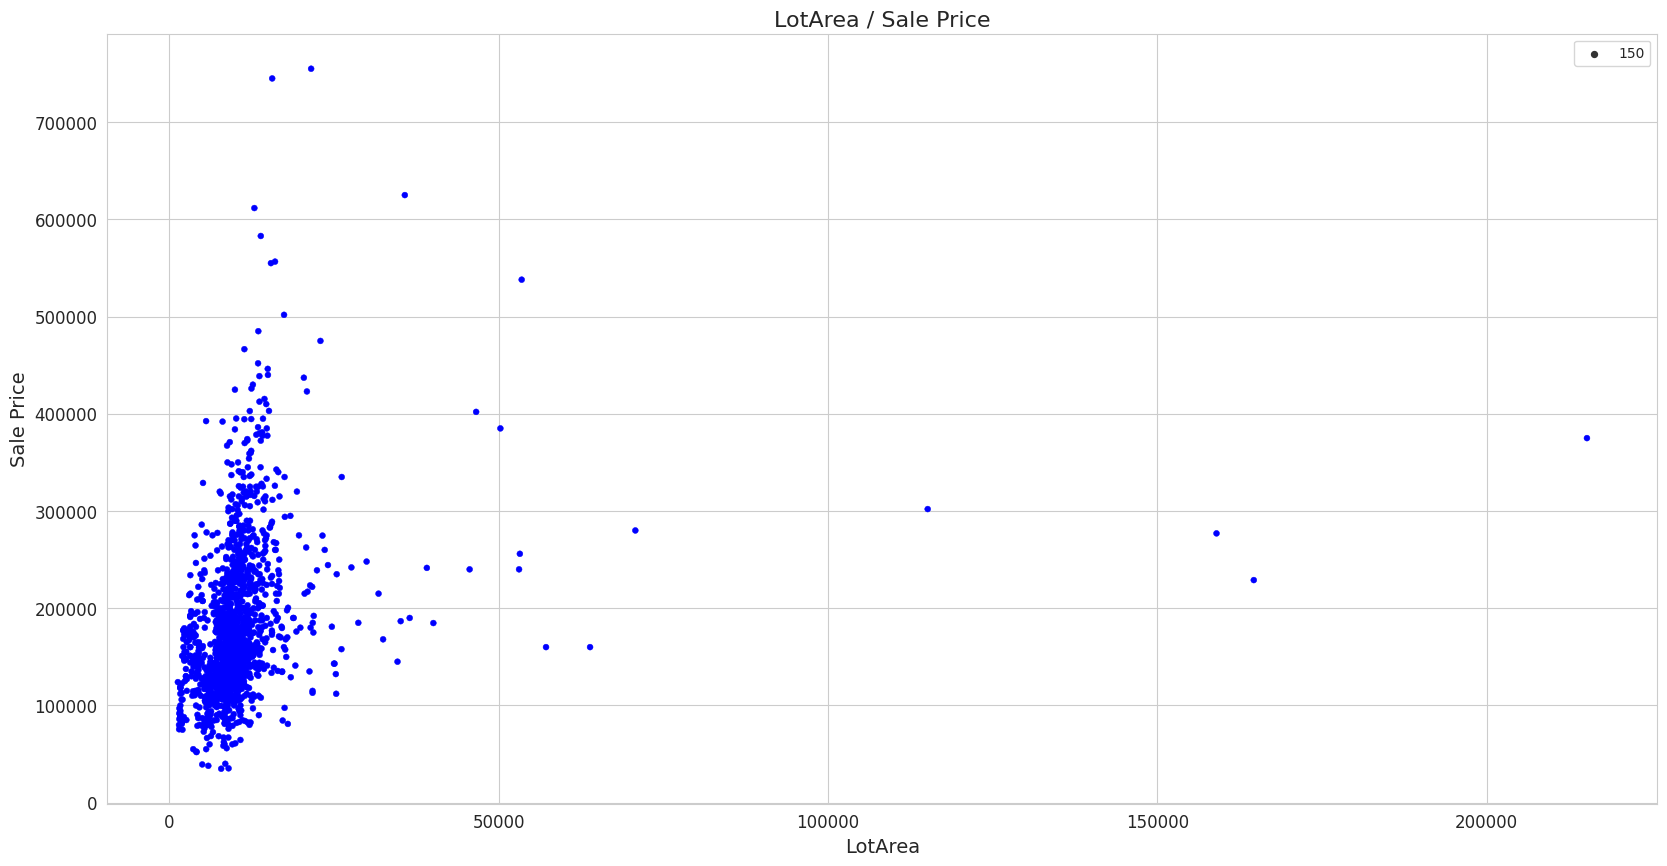

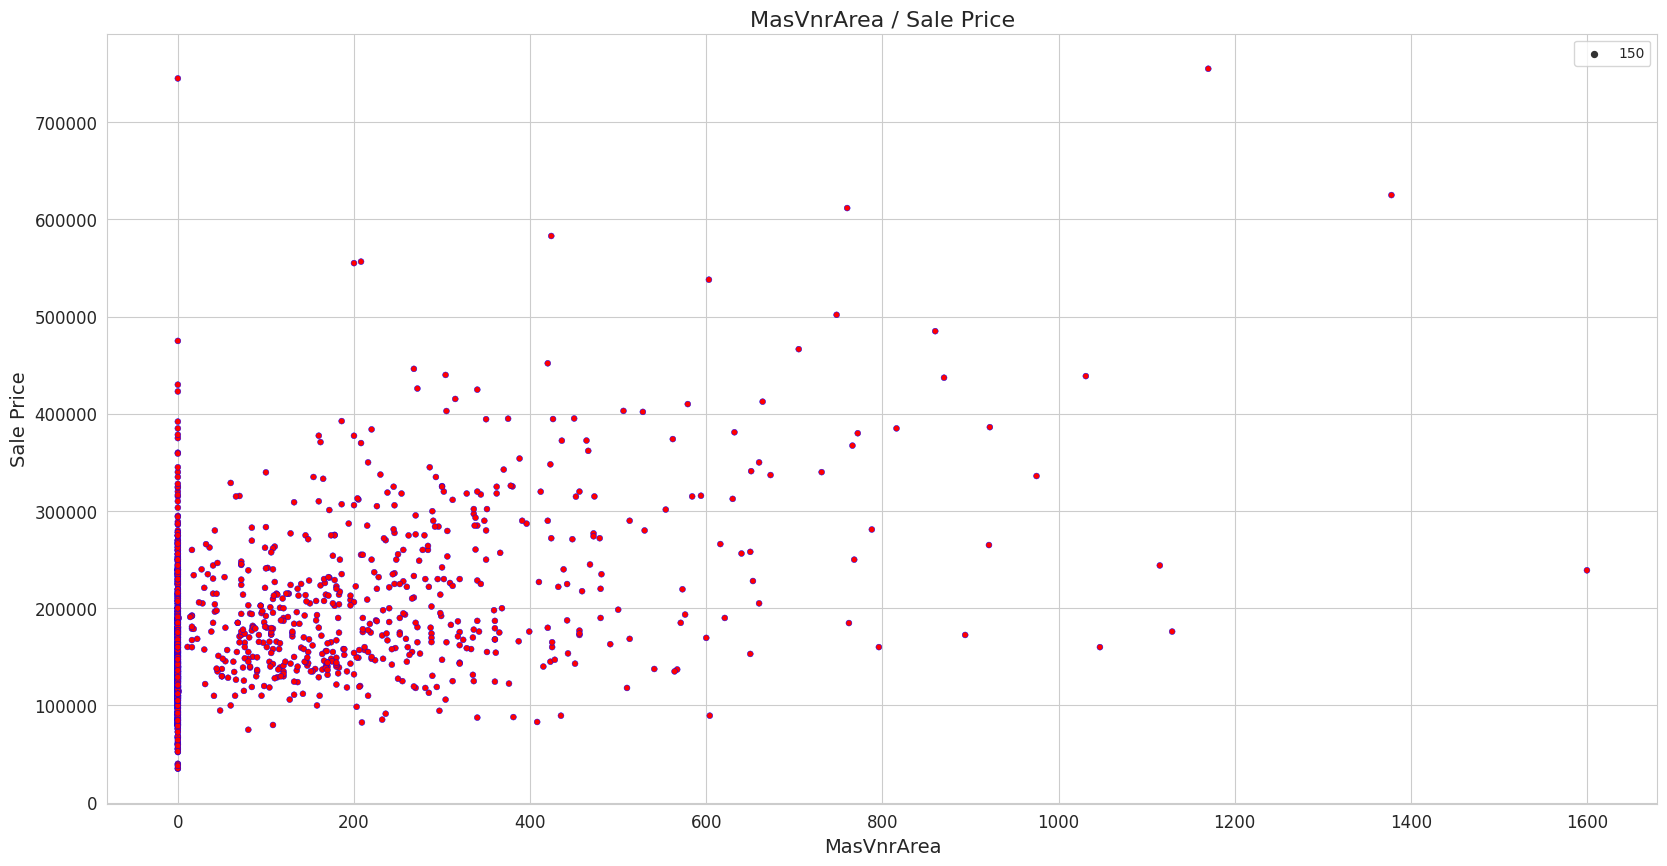

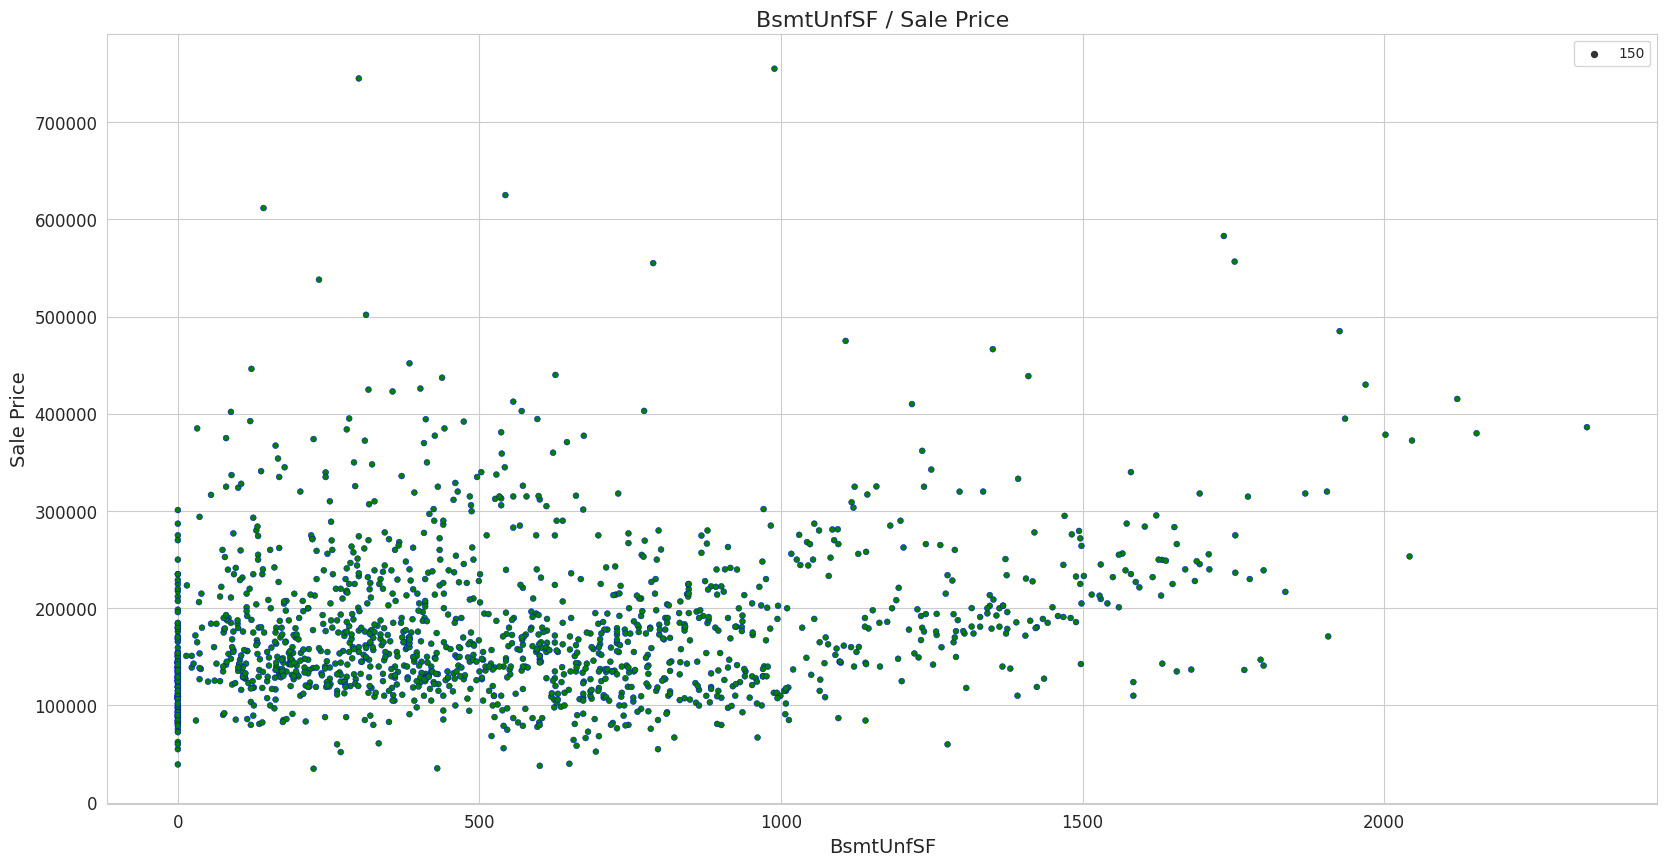

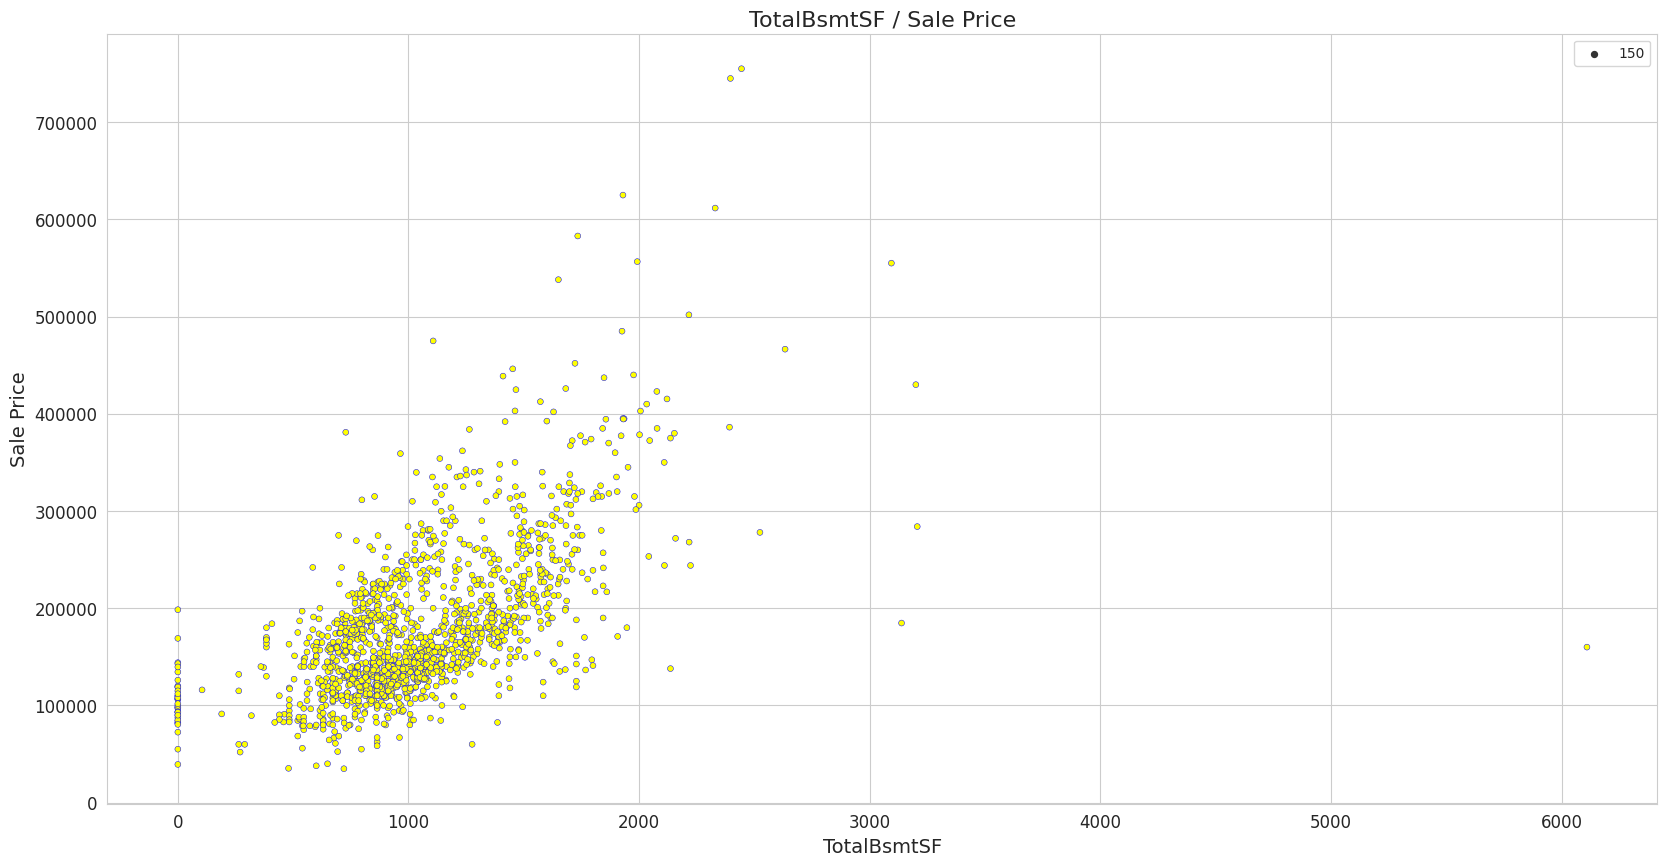

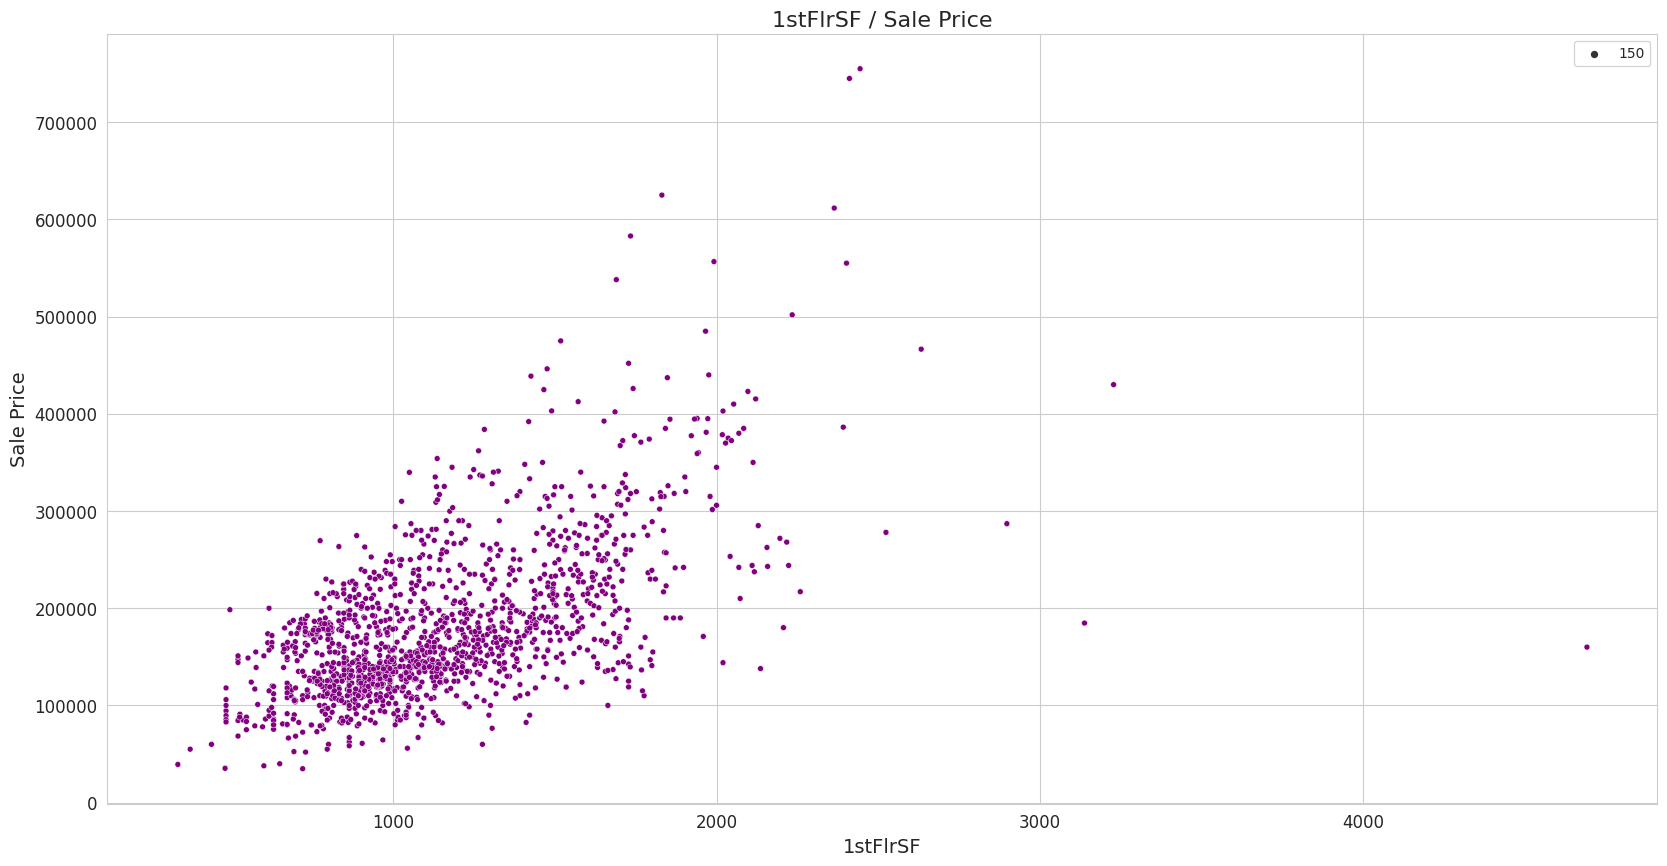

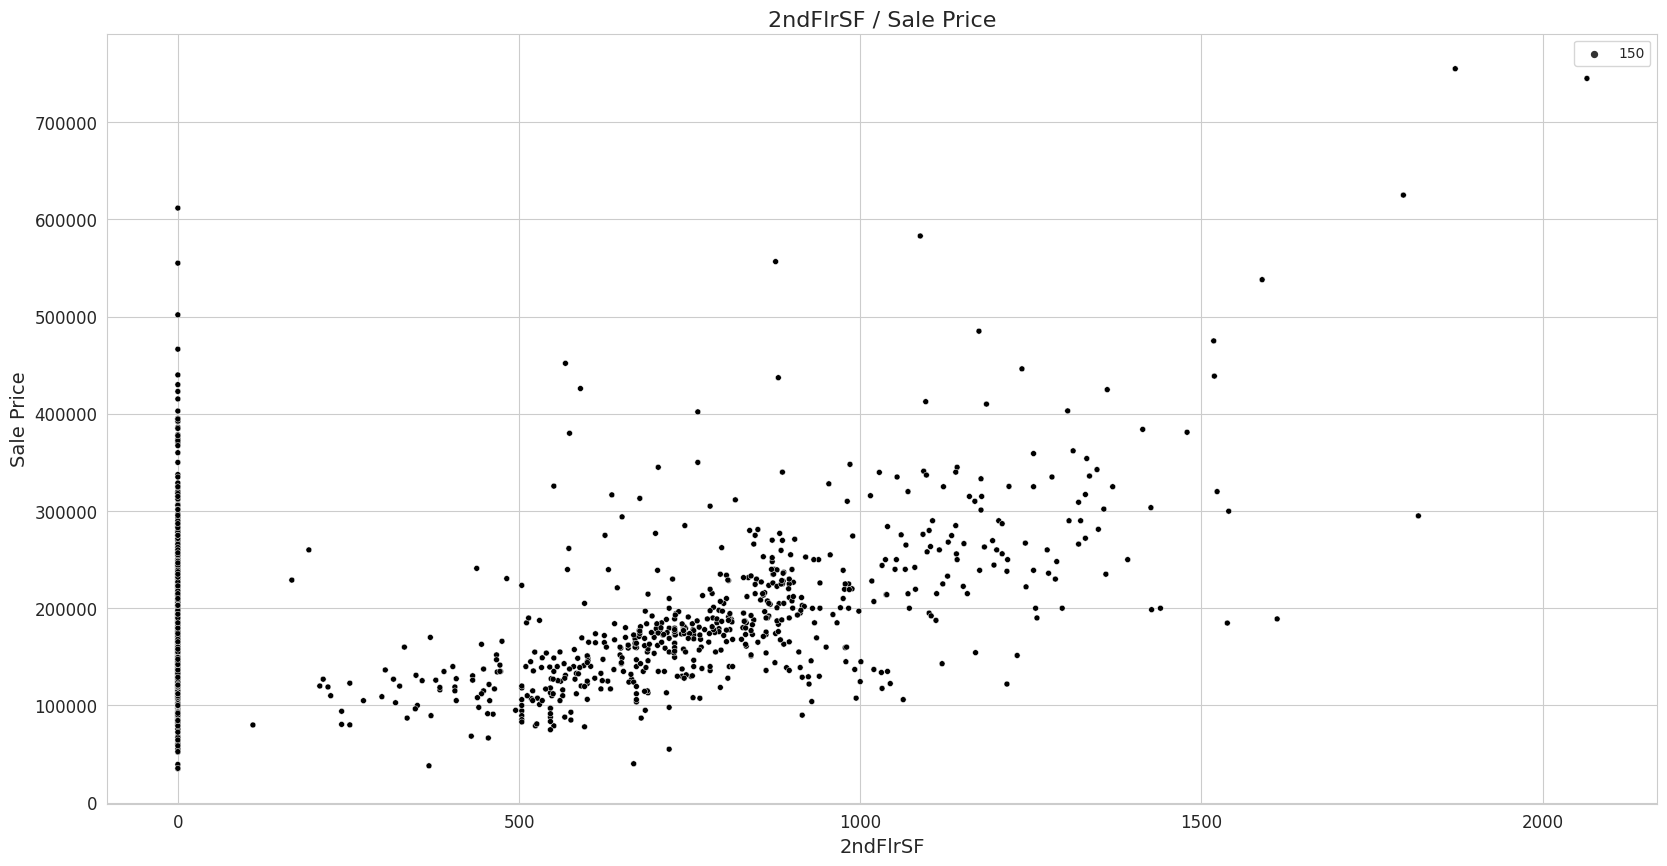

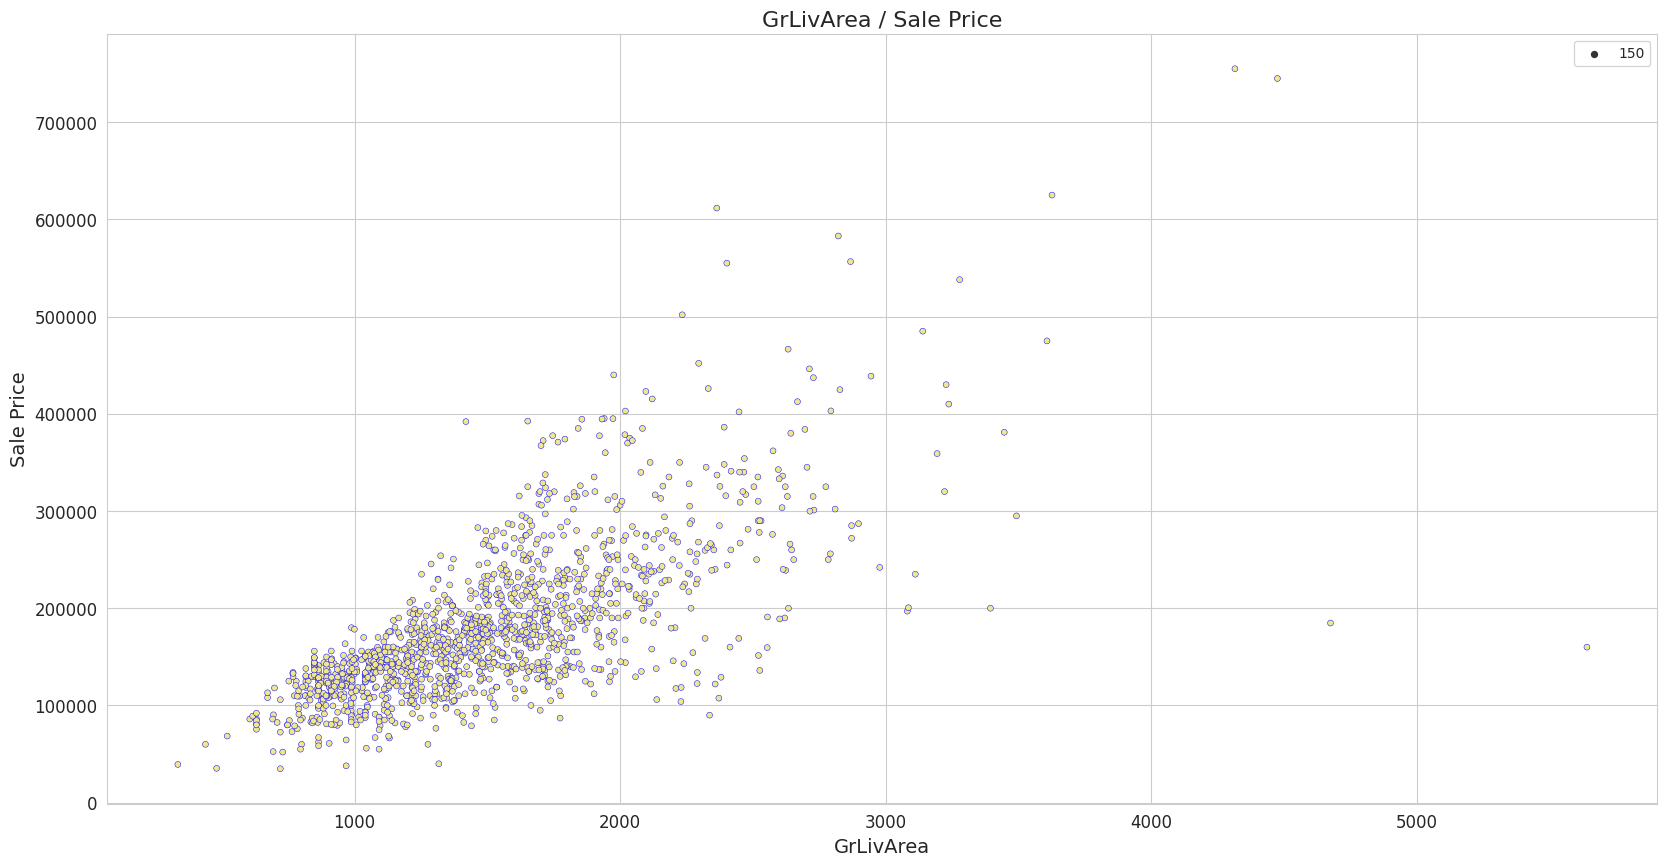

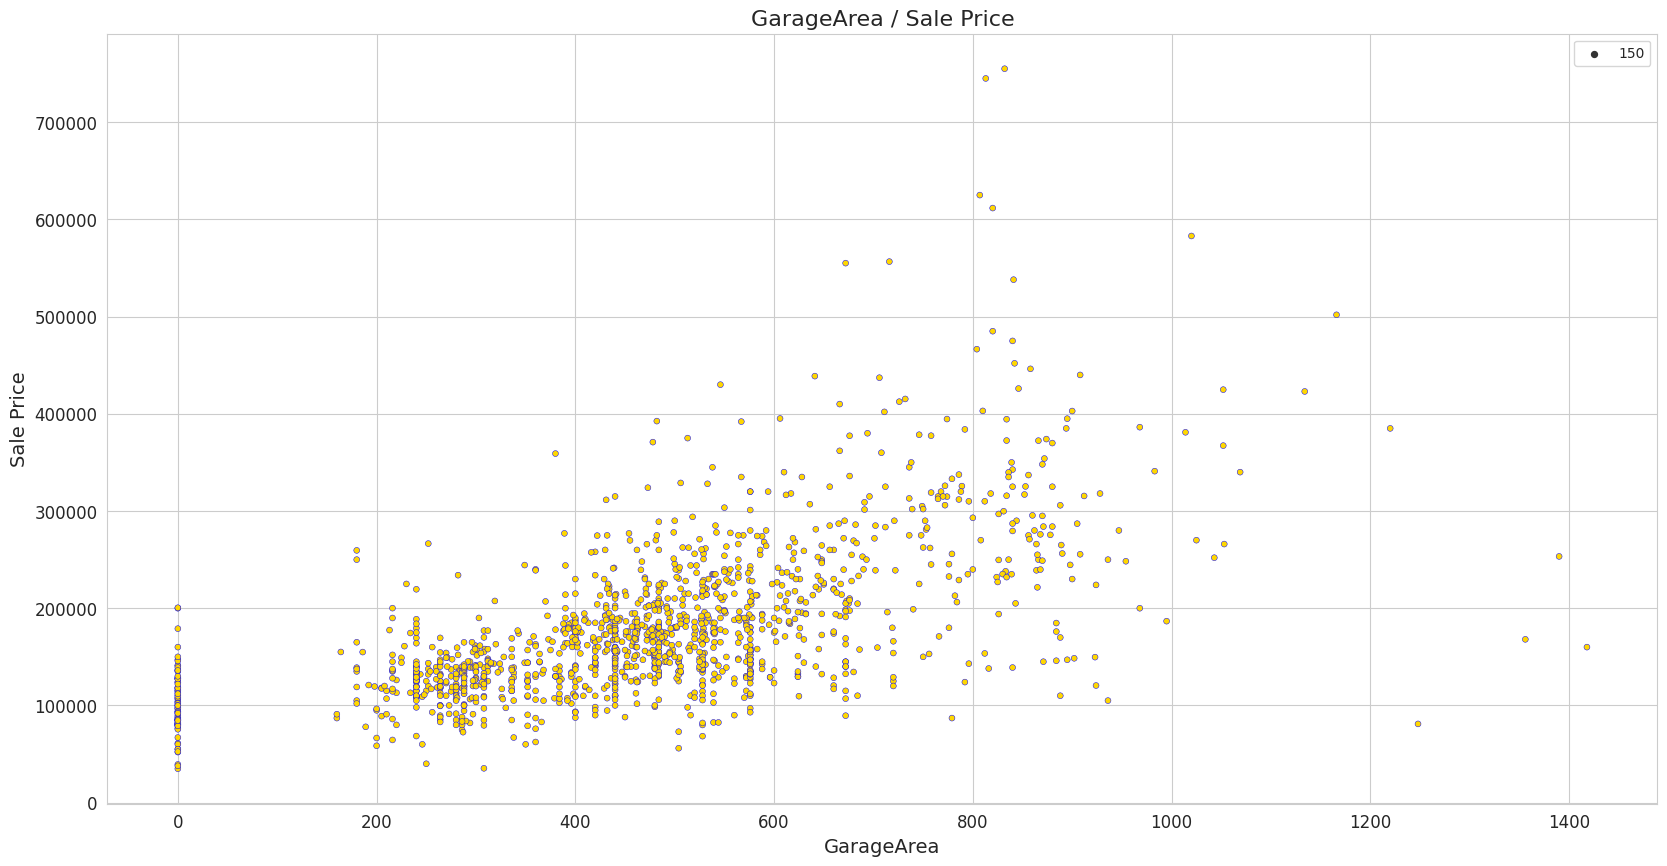

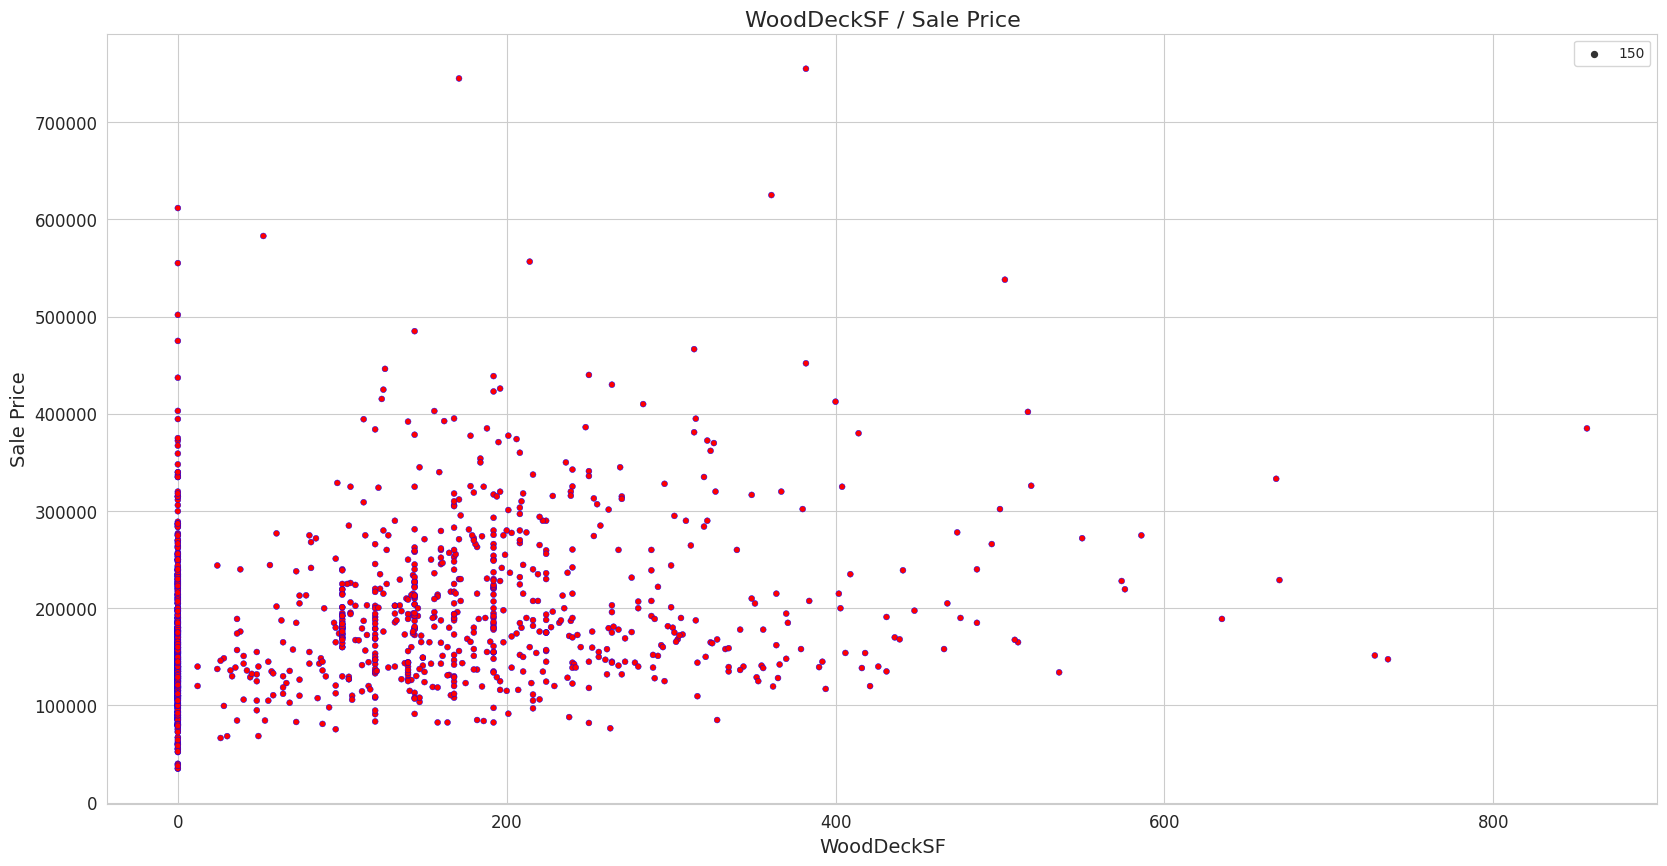

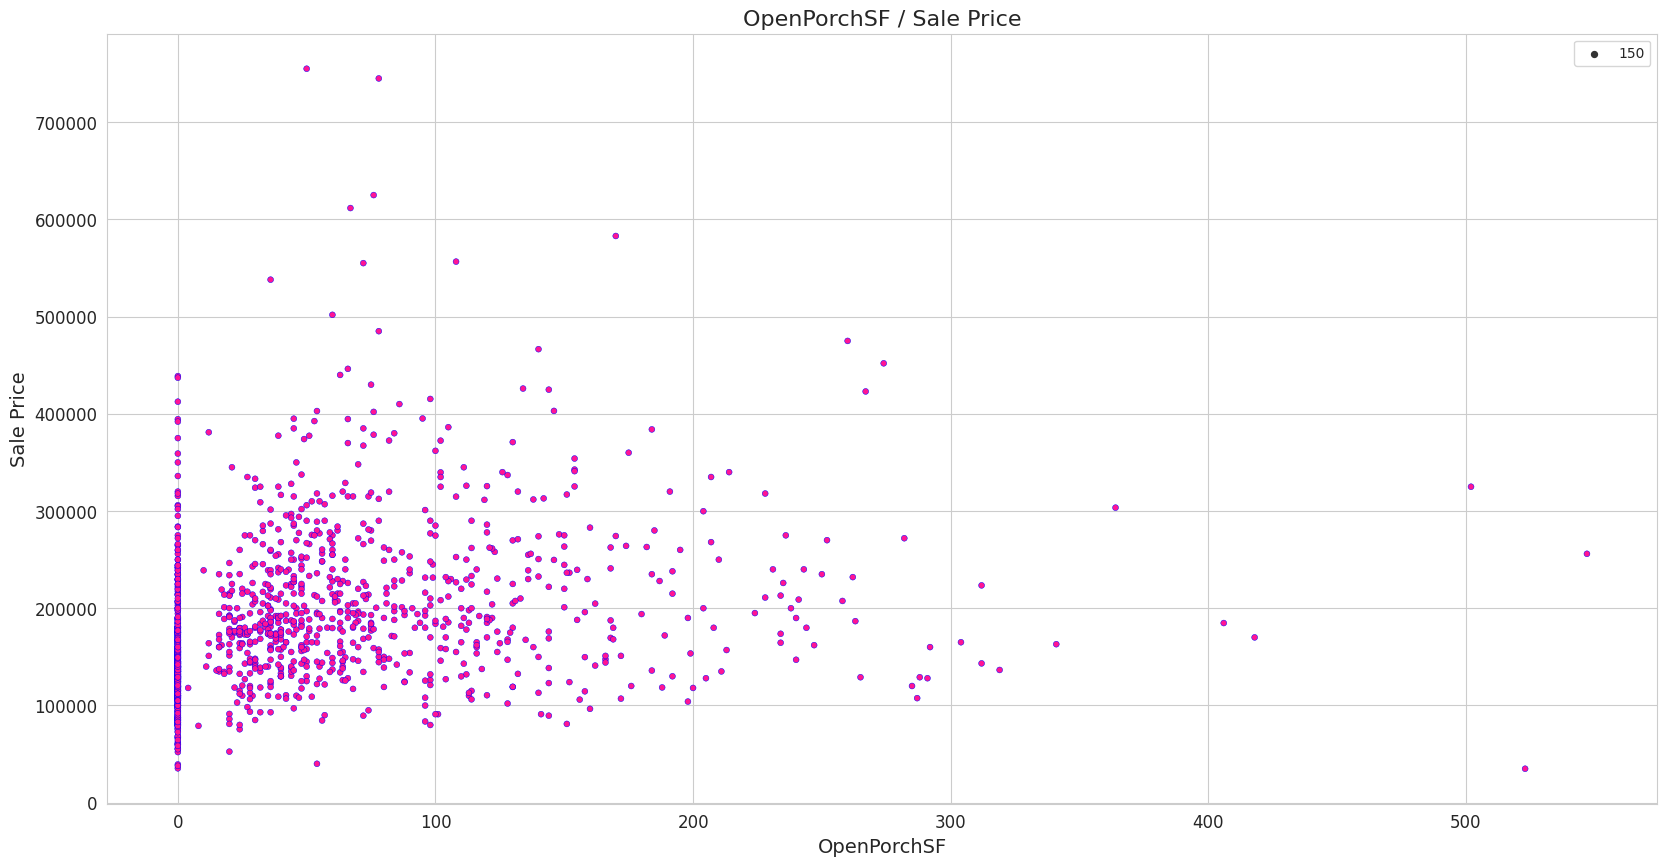

In [14]:
#plot graphs where dependant values are on x axis and sales price(independant var) is on y axis

def scatter(y_var):
    scatter_table = df.drop(y_var, axis = 1)
    list = df.columns
    
    graph1 = sb.scatterplot(data = df, x = list[1], y = y_var, color = 'blue', edgecolor = 'b', size = 150)
    plt.title('{} / Sale Price'.format(list[1]), fontsize = 16)
    plt.xlabel('{}'.format(list[1]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    graph2 = sb.scatterplot(data = df, x = list[2], y = y_var, color = 'red', edgecolor = 'b', size = 150)
    plt.title('{} / Sale Price'.format(list[2]), fontsize = 16)
    plt.xlabel('{}'.format(list[2]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    graph3 = sb.scatterplot(data = df, x = list[3], y = y_var, color = 'green', edgecolor = 'b', size = 150)
    plt.title('{} / Sale Price'.format(list[3]), fontsize = 16)
    plt.xlabel('{}'.format(list[3]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    graph4 = sb.scatterplot(data = df, x = list[4], y = y_var, color = 'yellow', edgecolor = 'b', size = 150)
    plt.title('{} / Sale Price'.format(list[4]), fontsize = 16)
    plt.xlabel('{}'.format(list[4]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    graph5 = sb.scatterplot(data = df, x = list[5], y = y_var, color = 'purple', edgecolor = 'white', size = 150)
    plt.title('{} / Sale Price'.format(list[5]), fontsize = 16)
    plt.xlabel('{}'.format(list[5]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    graph6 = sb.scatterplot(data = df, x = list[6], y = y_var, color = 'black', edgecolor = 'white', size = 150)
    plt.title('{} / Sale Price'.format(list[6]), fontsize = 16)
    plt.xlabel('{}'.format(list[6]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
    graph7 = sb.scatterplot(data = df, x = list[7], y = y_var, color = 'khaki', edgecolor = 'b', size = 150)
    plt.title('{} / Sale Price'.format(list[7]), fontsize = 16)
    plt.xlabel('{}'.format(list[7]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter7.png')
    plt.show()
    
    graph8 = sb.scatterplot(data = df, x = list[8], y = y_var, color = 'gold', edgecolor = 'b', size = 150)
    plt.title('{} / Sale Price'.format(list[8]), fontsize = 16)
    plt.xlabel('{}'.format(list[8]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter8.png')
    plt.show()
    
    graph9 = sb.scatterplot(data = df, x = list[9], y = y_var, color = 'r', edgecolor = 'b', size = 150)
    plt.title('{} / Sale Price'.format(list[9]), fontsize = 16)
    plt.xlabel('{}'.format(list[9]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter9.png')
    plt.show()
    
    graph10 = sb.scatterplot(data = df, x = list[10], y = y_var, color = 'deeppink', edgecolor = 'b', size = 150)
    plt.title('{} / Sale Price'.format(list[10]), fontsize = 16)
    plt.xlabel('{}'.format(list[10]), fontsize = 14)
    plt.ylabel('Sale Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter10.png')
    plt.show()
    
scatter('SalePrice')


/tmp/ipykernel_9087/292172064.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['SalePrice'], color='blue')


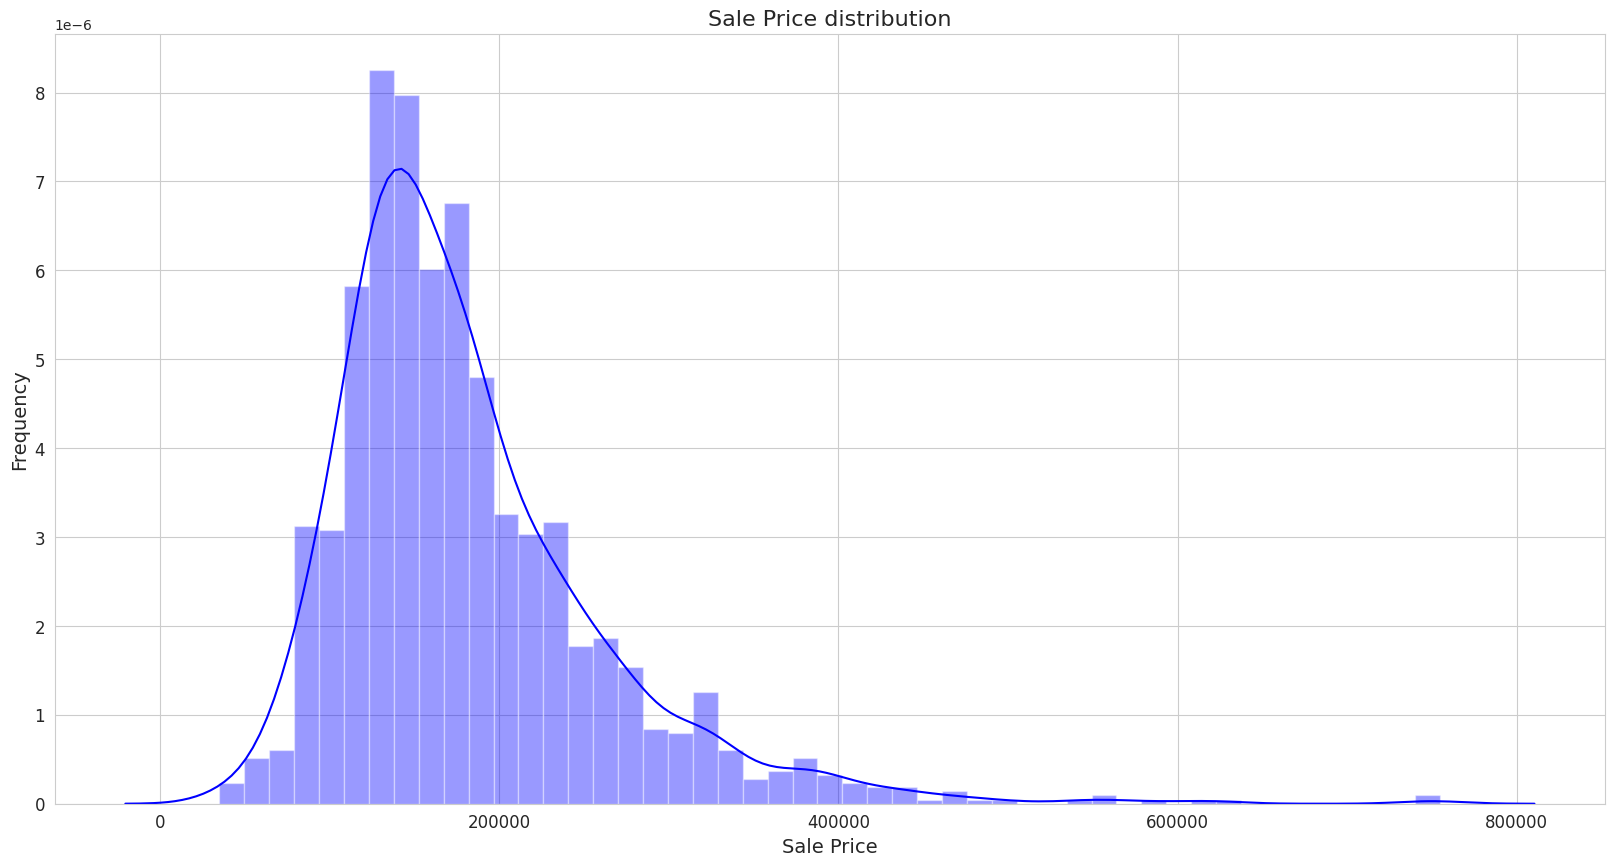

In [5]:
#plot in distribution plot
sb.distplot(df['SalePrice'], color='blue')
plt.title('Sale Price distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('Distribution.png')
plt.show()

In [16]:
#create training tests and and train
x_var = df[['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].values
y_var = df['SalePrice'].values
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.2, random_state=0)

print('X trained', x_train[0:5])
print('X test', x_test[0:5])
print('Y trained', y_train[0:5])
print('Y test', y_test[0:5])

X trained [[ 10200    219    678   1461   1509      0   1509    600    224      0]
 [  9947      0    577   1188   1217      0   1217    497    168     27]
 [  7200      0      0      0   1040      0   1040    625      0      0]
 [215245      0     80   2136   2036      0   2036    513      0      0]
 [  6120      0    952    952   1022    752   1774    468     90      0]]
X test [[ 1953   408   174   483   483   504   987   264    72     0]
 [ 4500   116   319  1216  1216     0  1216   402     0   125]
 [10762   344   284   978  1005   978  1983   490     0     0]
 [39104     0    96  1385  1363     0  1363   439    81     0]
 [10005   299   768  1160  1156   866  2022   505   288   117]]
Y trained [175000 173000 109500 375000 129900]
Y test [ 83000 164000 225000 241500 192000]


In [18]:
#now we make the models to actually predict the prices
#we will be using 4 models and choose the best one out of them i.e; the most accurate

bay = BayesianRidge()
bay.fit(x_train, y_train)
bay_pred = bay.predict(x_test)

las = Lasso(alpha = 0.01)
las.fit(x_train, y_train)
las_pred = las.predict(x_test)

el = ElasticNet(alpha = 0.01)
el.fit(x_train, y_train)
el_pred = el.predict(x_test)

forest = RandomForestRegressor()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)




/home/kyo/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.209e+12, tolerance: 7.239e+08
  model = cd_fast.enet_coordinate_descent(
/home/kyo/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e+12, tolerance: 7.239e+08
  model = cd_fast.enet_coordinate_descent(


In [23]:
#now we will evaluate these 3 models using r2score which basically tells how far the predicted value is from the calculated value i.e; checks variance. High variance or % means more accurate
#grid search can be used amongst the best of these values to fine tune the model further and give a better result
print("bayesian ", r2(y_test, bay_pred))
print("lasso ", r2(y_test, las_pred))
print("elasticnet ", r2(y_test, el_pred))
print("random forest ", r2(y_test, forest_pred))

bayesian  0.7718873625592493
lasso  0.7723836936973347
elasticnet  0.7723836929218634
random forest  0.8009042641938736
